In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.neighbors import KDTree
import plotly.express as px
from sklearn.cluster import SpectralClustering
from spectral_clustering import SpectralClustering
import plotly.express as px
from clustering_utils import *

In [114]:
%reload_ext autoreload
%autoreload 2

In [115]:
def make_simple_clusters(n=100, noise=0.05):
    
    half = round(n/2)
    x_noise_1 = np.random.normal(0, noise, half)
    y_noise_1 = np.random.normal(0, noise, n-half)
    x_noise_2 = np.random.normal(1, noise, half)
    y_noise_2 = np.random.normal(1, noise, n-half)

    x = np.concatenate([x_noise_1, x_noise_2])
    y = np.concatenate([y_noise_1, y_noise_2])
    points = np.zeros((n,2))
    labels = np.zeros((n))
    points[:,0] = x
    points[:,1] = y
    labels[half:] = 1

    return points, labels

In [142]:
X, y = make_moons(200, noise=0.05)
#X, y = make_simple_clusters(200, noise=0.2)

In [143]:
x, y = X[:,0], X[:,1]


In [118]:
adj = create_exponential_adjacency_matrix(X)

In [119]:
adj[9].shape

(200,)

In [129]:
df = pd.DataFrame({"x":x, "y":y, "inverse distance":adj[9]})

In [130]:
df

,x,y,inverse distance
0,0.302853,-0.064435,0.921603
1,0.058655,0.294657,0.958963
2,0.166245,0.259732,0.961187
3,-0.323604,0.093978,0.861523
4,-0.401111,-0.039394,0.793240
...,...,...,...
195,0.855864,1.139769,0.177011
196,1.051299,1.015910,0.159589
197,1.234791,0.970807,0.116458
198,0.904437,1.184080,0.148678


In [131]:
fig = px.scatter(df, x="x", y="y", color="inverse distance", width=800, height=800, title="RBF values for same selected point")
fig. update_coloraxes(showscale=True)
fig.update_traces(marker=dict(size=12,

                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

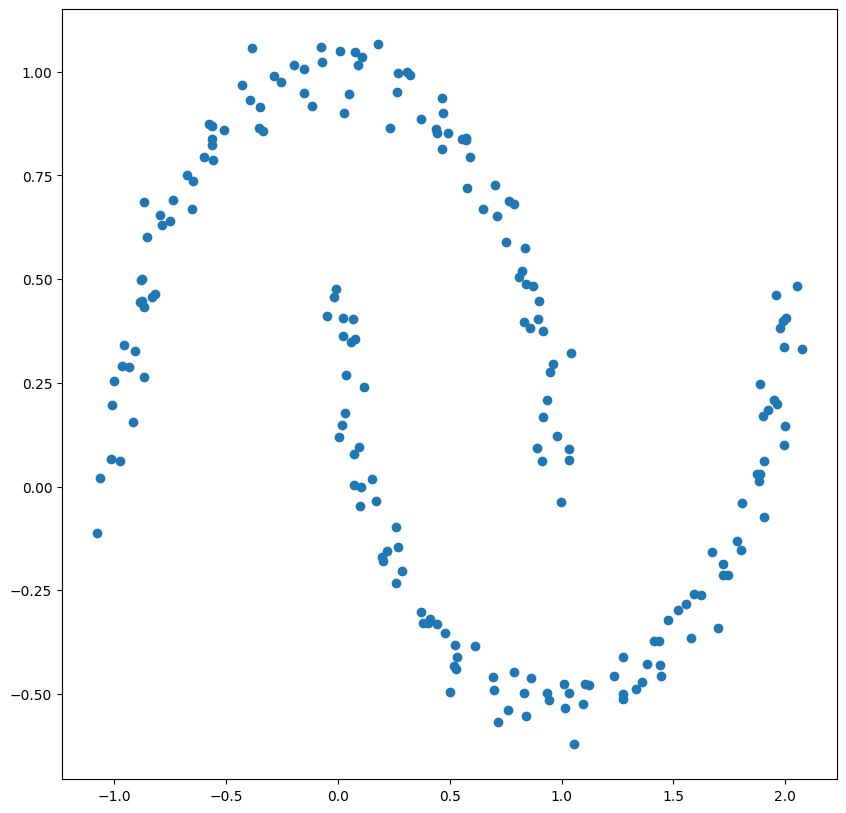

In [144]:
plt.figure(figsize=(10,10))
plt.plot(x, y, 'o')
plt.show()

In [38]:
# sc = SpectralClustering(n_clusters=2, gamma=12)
# labels = sc.fit_predict(X)

In [161]:
sc = SpectralClustering(k=20, affinity="nearest_neighbors", gamma=15)
labels = sc.fit(X)

In [162]:
fig = px.scatter(x=x, y=y, color=labels, width=800, height=800, title="Labels chosen by spectral clustering using knn")
fig.show()